In [133]:
# Install packages
!pip install minisom

In [134]:
# Mengimpor library

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from minisom import MiniSom

In [135]:
# Membaca file CSV 'HepatitisCdata_Mod.csv' dan menyimpannya ke dalam dataframe df
df = pd.read_csv('HepatitisCdata_Mod.csv')
# Menampilkan dataset df (HepatitisCdata_Mod.csv)
df

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,1,32,1,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,2,32,1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,3,32,1,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,4,32,1,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,5,32,1,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,62,0,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1
611,612,64,0,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1
612,613,64,0,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,614,46,0,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1


In [136]:
# Data preprocessing

# Menghapus kolom "Unnamed: 0" dari dataframe df
df = df.drop(columns=["Unnamed: 0"])

# Memisahkan fitur (features) dari variabel target
# Meng-assign dataframe tanpa kolom "Category" ke variabel X sebagai fitur
X = df.drop(columns=["Category"])

# Meng-assign kolom "Category" dari dataframe df ke variabel y sebagai target
y = df["Category"]

In [137]:
# Menampilkan variabel X
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,0,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,0,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [138]:
# Menampilkan variabel y
y

0      0
1      0
2      0
3      0
4      0
      ..
610    1
611    1
612    1
613    1
614    1
Name: Category, Length: 615, dtype: int64

In [139]:
# Min-Max Normalization

# Membuat objek MinMaxScaler untuk normalisasi
scaler = MinMaxScaler()

 # Melakukan normalisasi Min-Max pada data fitur X dan menyimpan hasilnya ke X_scaled
X_scaled = scaler.fit_transform(X)

In [140]:
# Split data into training (80%) dan testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [141]:
# Menampilkan variabel X_train
X_train

array([[0.34482759, 1.        , 0.32243685, ..., 0.06441976, 0.02800124,
        0.47566372],
       [0.34482759, 1.        , 0.45913819, ..., 0.06441976, 0.01763614,
        0.67920354],
       [0.5862069 , 1.        , 0.43982169, ..., 0.05788442, 0.02134901,
        0.60176991],
       ...,
       [0.68965517, 1.        , 0.36998514, ..., 0.07282233, 0.02196782,
        0.59955752],
       [0.5       , 0.        , 0.43833581, ..., 0.0616189 , 0.00897277,
        0.62610619],
       [0.37931034, 1.        , 0.40713224, ..., 0.07282233, 0.03094059,
        0.69247788]])

In [142]:
# Menampilkan variabel y_train
y_train

83     0
90     0
228    0
509    0
329    0
      ..
71     0
106    0
270    0
435    0
102    0
Name: Category, Length: 492, dtype: int64

In [143]:
# Mengubah y_train menjadi array numpy
y_train = np.array(y_train)

# Mengubah y_test menjadi array numpy
y_test = np.array(y_test)

In [144]:
# Menampilkan variabel y_train
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 3,
       1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0,
       0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [145]:
# LVQ
class LVQ:
    def __init__(self, learning_rate=0.01, n_classes=2, n_features=None, n_prototypes=1, epochs=100):
        self.learning_rate = learning_rate
        self.n_classes = n_classes
        self.n_features = n_features
        self.n_prototypes = n_prototypes
        self.epochs = epochs
        self.prototypes = None
        self.prototype_labels = None

    def fit(self, X, y):
        np.random.seed(42)
        self.prototypes = np.zeros((self.n_classes * self.n_prototypes, self.n_features))
        self.prototype_labels = np.zeros(self.n_classes * self.n_prototypes)

        for i in range(self.n_classes):
            idx = np.random.choice(np.where(y == i)[0], self.n_prototypes)
            self.prototypes[i * self.n_prototypes:(i + 1) * self.n_prototypes] = X[idx]
            self.prototype_labels[i * self.n_prototypes:(i + 1) * self.n_prototypes] = y[idx]

        for epoch in range(self.epochs):
            for i in range(len(X)):
                distances = np.linalg.norm(self.prototypes - X[i], axis=1)
                winner_idx = np.argmin(distances)
                # Debugging statements
                print(f"Epoch: {epoch}, Sample: {i}")
                print(f"Winner Index: {winner_idx}, Prototype Label: {self.prototype_labels[winner_idx]}, Actual Label: {y[i]}")
                if self.prototype_labels[winner_idx] == y[i]:
                    self.prototypes[winner_idx] += self.learning_rate * (X[i] - self.prototypes[winner_idx])
                else:
                    self.prototypes[winner_idx] -= self.learning_rate * (X[i] - self.prototypes[winner_idx])

    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            distances = np.linalg.norm(self.prototypes - X[i], axis=1)
            winner_idx = np.argmin(distances)
            y_pred[i] = self.prototype_labels[winner_idx]
        return y_pred


# Fungsi untuk training dan testing LVQ model
def train_lvq(X_train, y_train, X_test, y_test, learning_rate):
    lvq = LVQ(learning_rate=learning_rate, n_classes=len(np.unique(y_train)), n_features=X_train.shape[1])
    lvq.fit(X_train, y_train)
    y_pred = lvq.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, y_pred, report

In [146]:
# Fungsi untuk training dan testing SOM model
def train_som(X_train, y_train, X_test, y_test, learning_rate):
    som = MiniSom(x=10, y=10, input_len=X_train.shape[1], sigma=1.0, learning_rate=learning_rate)
    som.random_weights_init(X_train)
    som.train_random(X_train, 100)  # Training 100 iterasi

    # Mapping training data ke SOM
    win_map = som.win_map(X_train)

    # Debugging output
    print("Win map keys:", win_map.keys())

    y_pred = []
    for x in X_test:
        win_position = som.winner(x)

        # Debugging output
        print(f"Winner position: {win_position}")

        if win_position in win_map:
            # Mengekstrak label dari winning nodes saat training
            labels = y_train[[np.where((X_train == w).all(axis=1))[0][0] for w in win_map[win_position]]]
            print(f"Labels for win position {win_position}: {labels}")

            win_label = np.bincount(labels).argmax()
            y_pred.append(win_label)
        else:
            # Random guess  jika tidak ada winner
            y_pred.append(np.random.choice(np.unique(y_train)))  # Random guess if no winner

    y_pred = np.array(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, y_pred, report

In [159]:
# Initial learning rates
learning_rates = [0.5, 0.25, 0.1, 0.05, 0.01]

# Calculate accuracies and predictions untuk setiap learning rates
lvq_results = [train_lvq(X_train, y_train, X_test, y_test, lr) for lr in learning_rates]
som_results = [train_som(X_train, y_train, X_test, y_test, lr) for lr in learning_rates]

lvq_accuracies = [result[0] for result in lvq_results]
som_accuracies = [result[0] for result in som_results]

lvq_predictions = [result[1] for result in lvq_results]
som_predictions = [result[1] for result in som_results]

lvq_reports = [result[2] for result in lvq_results]
som_reports = [result[2] for result in som_results]

Streaming output truncated to the last 5000 lines.
Epoch: 94, Sample: 452
Winner Index: 0, Prototype Label: 0.0, Actual Label: 1
Epoch: 94, Sample: 453
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 454
Winner Index: 0, Prototype Label: 0.0, Actual Label: 1
Epoch: 94, Sample: 455
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 456
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 457
Winner Index: 0, Prototype Label: 0.0, Actual Label: 2
Epoch: 94, Sample: 458
Winner Index: 0, Prototype Label: 0.0, Actual Label: 3
Epoch: 94, Sample: 459
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 460
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 461
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 462
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 463
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Streaming output truncated to the last 5000 lines.
Epoch: 95, Sample: 467
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 468
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 469
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 470
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 471
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 472
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 473
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 474
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 475
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 476
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 477
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 478
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Streaming output truncated to the last 5000 lines.
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 273
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 274
Winner Index: 1, Prototype Label: 1.0, Actual Label: 3
Epoch: 95, Sample: 275
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 276
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 277
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 278
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 279
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 280
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 281
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 282
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 283
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 284
Winner Index:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Streaming output truncated to the last 5000 lines.
Epoch: 94, Sample: 452
Winner Index: 1, Prototype Label: 1.0, Actual Label: 1
Epoch: 94, Sample: 453
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 454
Winner Index: 0, Prototype Label: 0.0, Actual Label: 1
Epoch: 94, Sample: 455
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 456
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 457
Winner Index: 0, Prototype Label: 0.0, Actual Label: 2
Epoch: 94, Sample: 458
Winner Index: 0, Prototype Label: 0.0, Actual Label: 3
Epoch: 94, Sample: 459
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 460
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 461
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 462
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sample: 463
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 94, Sa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Streaming output truncated to the last 5000 lines.
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 95
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 96
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 97
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 98
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 99
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 100
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 101
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 102
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 103
Winner Index: 0, Prototype Label: 0.0, Actual Label: 2
Epoch: 95, Sample: 104
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 105
Winner Index: 0, Prototype Label: 0.0, Actual Label: 0
Epoch: 95, Sample: 106
Winner Index: 0, P

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Labels for win position (1, 8): [0 0 0 0 0 0 0 0 0]
Winner position: (2, 1)
Labels for win position (2, 1): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Winner position: (1, 0)
Labels for win position (1, 0): [0 0 0 0 0]
Winner position: (9, 3)
Labels for win position (9, 3): [0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 3]
Winner position: (7, 5)
Labels for win position (7, 5): [0 0 0 0 4]
Winner position: (7, 3)
Labels for win position (7, 3): [0 0 0 0 0 0 0 0 0 0 0 0 0]
Winner position: (4, 9)
Labels for win position (4, 9): [0 0]
Winner position: (2, 4)
Labels for win position (2, 4): [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
Winner position: (5, 7)
Labels for win position (5, 7): [0 0 0 0 0 0]
Winner position: (4, 9)
Labels for win position (4, 9): [0 0]
Winner position: (9, 3)
Labels for win position (9, 3): [0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 3]
Winner position: (8, 6)
Labels for win position (8, 6): [0 0 1]
Winner position: (3, 3)
Labels for win position (3, 3): [1 1 1 1 1]
Winner position: (9, 6)
Labels for win pos

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Win map keys: dict_keys([(6, 5), (9, 0), (7, 2), (7, 4), (6, 7), (7, 7), (8, 5), (6, 4), (4, 1), (3, 2), (2, 5), (4, 3), (3, 8), (6, 0), (9, 3), (3, 7), (8, 0), (5, 9), (1, 5), (5, 4), (2, 6), (1, 4), (5, 2), (7, 6), (2, 9), (9, 1), (4, 6), (5, 8), (8, 6), (0, 3), (0, 9), (2, 1), (6, 1), (7, 8), (9, 7), (0, 8), (9, 9), (1, 9), (0, 7), (5, 6), (8, 4), (6, 2), (7, 5), (5, 1), (5, 3), (5, 0), (2, 2), (7, 3), (3, 3), (0, 0), (0, 4), (8, 2), (3, 9), (4, 7), (1, 8), (0, 6), (1, 6), (5, 7), (0, 5), (4, 4), (4, 9), (2, 7), (2, 0), (3, 6), (8, 1), (7, 9), (9, 4), (1, 7), (9, 6), (4, 8), (8, 9), (5, 5), (7, 1), (9, 8), (0, 2), (3, 5), (9, 5), (3, 0), (4, 5), (8, 7), (3, 1), (6, 8), (9, 2), (6, 9), (2, 4), (1, 0), (1, 1), (2, 8), (4, 0), (8, 8), (1, 3), (6, 3), (1, 2), (2, 3), (3, 4), (0, 1)])
Winner position: (8, 1)
Labels for win position (8, 1): [4 0 0 0]
Winner position: (3, 6)
Labels for win position (3, 6): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
Winner position: (4, 7)
Labels for win position (4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Labels for win position (4, 8): [0 2 0 0 0]
Winner position: (9, 2)
Labels for win position (9, 2): [0 0 0 0 0 0 0 0 0 0 0]
Winner position: (6, 0)
Labels for win position (6, 0): [0 0 0 0 0 0 0 0 0 0]
Winner position: (9, 8)
Labels for win position (9, 8): [0 1]
Winner position: (7, 2)
Labels for win position (7, 2): [3 0]
Winner position: (9, 8)
Labels for win position (9, 8): [0 1]
Winner position: (7, 9)
Labels for win position (7, 9): [0 0 0 0 0 0 0 0]
Winner position: (7, 2)
Labels for win position (7, 2): [3 0]
Winner position: (9, 2)
Labels for win position (9, 2): [0 0 0 0 0 0 0 0 0 0 0]
Winner position: (4, 2)
Labels for win position (4, 2): [0 0 0 0 0 0 0 0]
Winner position: (5, 9)
Labels for win position (5, 9): [0 0 0 0 0]
Winner position: (9, 8)
Labels for win position (9, 8): [0 1]
Winner position: (4, 0)
Labels for win position (4, 0): [0 0 0 0 0 0 0 0 0 0 0]
Winner position: (9, 8)
Labels for win position (9, 8): [0 1]
Winner position: (5, 1)
Labels for win position (5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
# Display classification reports untuk LVQ
for lr, report in zip(learning_rates, lvq_reports):
    print(f"LVQ Classification Report for learning rate {lr}:\n{report}")

LVQ Classification Report for learning rate 0.5:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        96
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         3

    accuracy                           0.78       123
   macro avg       0.16      0.20      0.18       123
weighted avg       0.61      0.78      0.68       123

LVQ Classification Report for learning rate 0.25:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        96
           1       1.00      0.33      0.50         9
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         9
           4       1.00      0.33      0.50         3

    accuracy                           0.81       123
   macro avg       0.56      0.3

In [155]:
# Display classification reports untuk SOM
for lr, report in zip(learning_rates, som_reports):
    print(f"SOM Classification Report for learning rate {lr}:\n{report}")

SOM Classification Report for learning rate 0.5:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        96
           1       1.00      0.22      0.36         9
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         3

    accuracy                           0.80       123
   macro avg       0.36      0.24      0.25       123
weighted avg       0.69      0.80      0.72       123

SOM Classification Report for learning rate 0.25:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        96
           1       0.75      0.33      0.46         9
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         3

    accuracy                           0.80       123
   macro avg       0.31      0.2

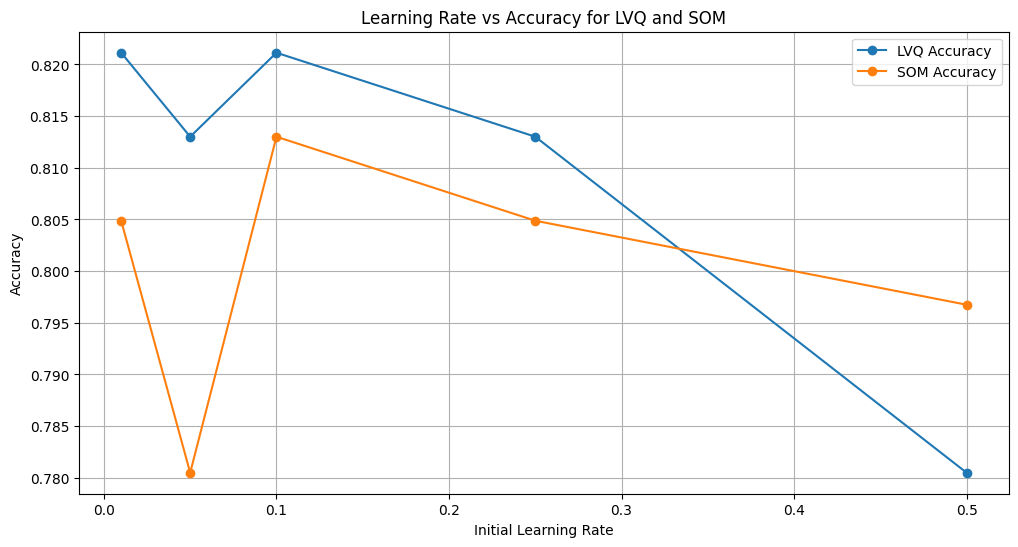

In [156]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(learning_rates, lvq_accuracies, marker='o', label='LVQ Accuracy')
plt.plot(learning_rates, som_accuracies, marker='o', label='SOM Accuracy')
plt.xlabel('Initial Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuracy for LVQ and SOM')
plt.legend()
plt.grid(True)
plt.show()

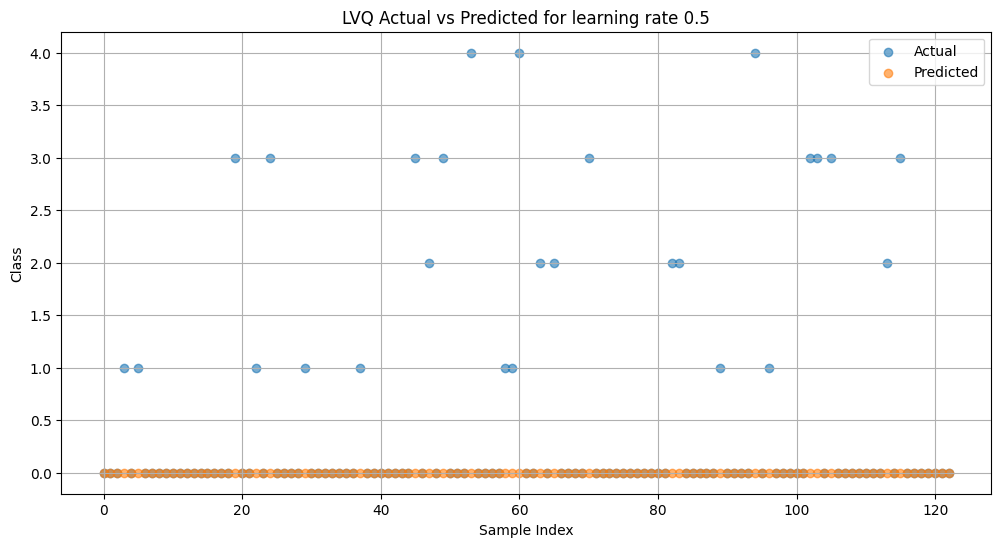

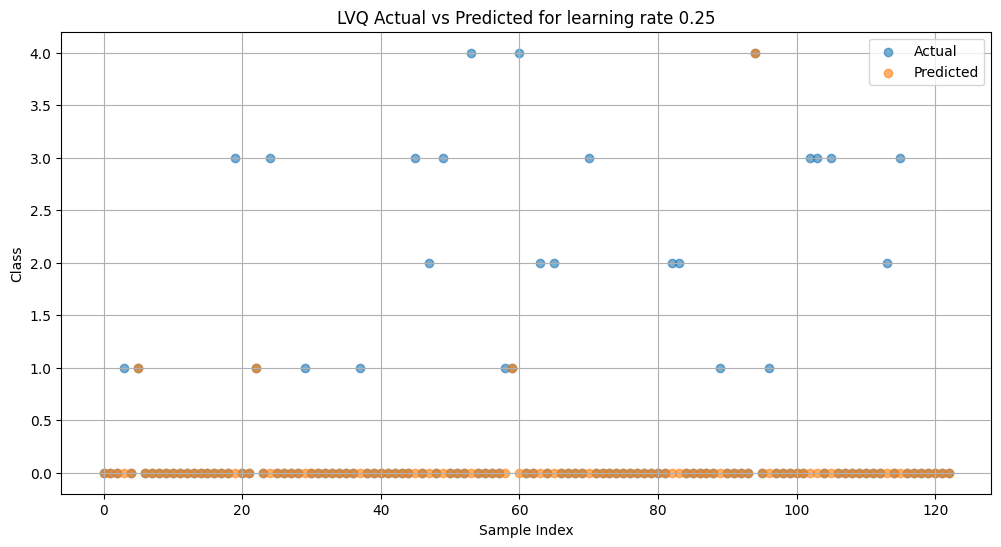

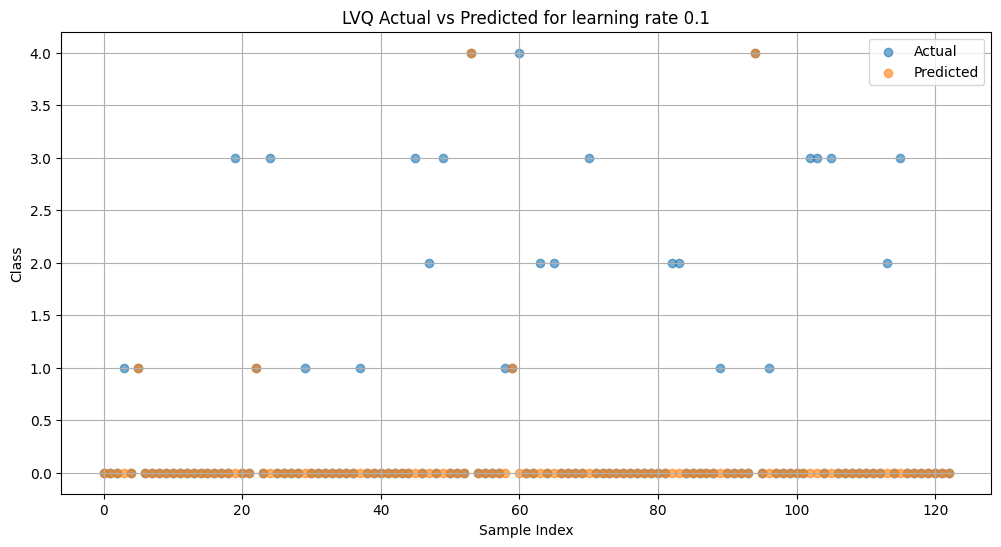

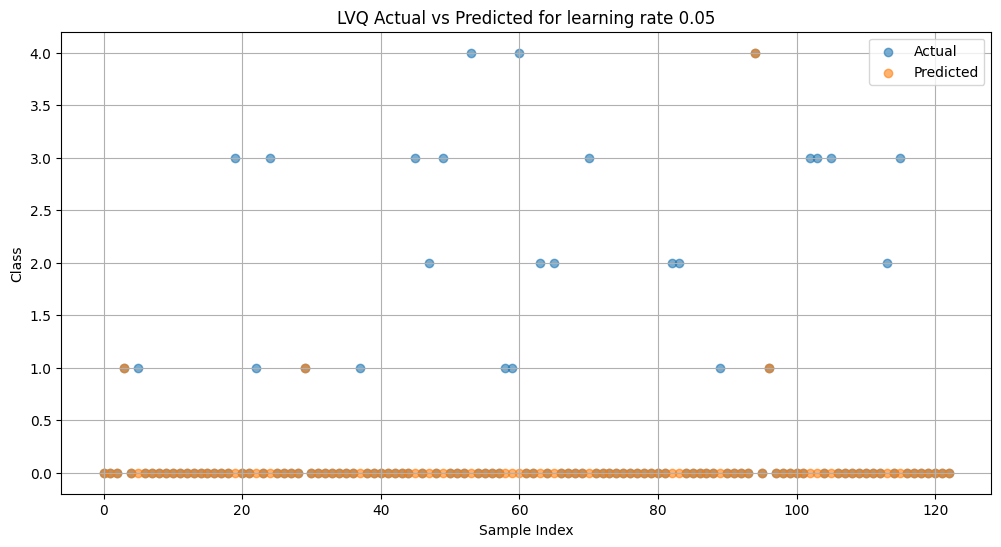

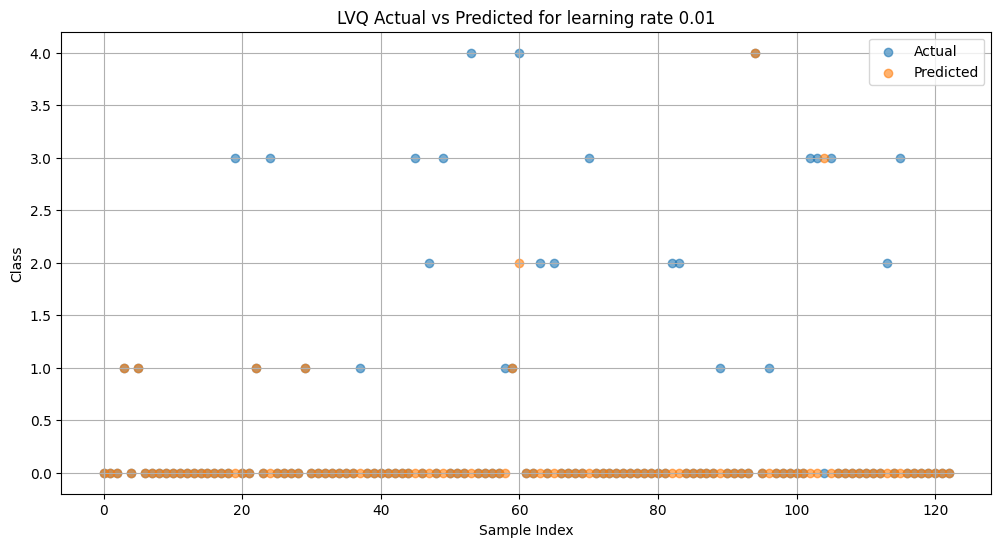

In [157]:
# Plotting Actual vs Predicted untuk LVQ
for lr, y_pred in zip(learning_rates, lvq_predictions):
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(y_test)), y_test, alpha=0.6, label='Actual')
    plt.scatter(range(len(y_test)), y_pred, alpha=0.6, label='Predicted')
    plt.title(f'LVQ Actual vs Predicted for learning rate {lr}')
    plt.xlabel('Sample Index')
    plt.ylabel('Class')
    plt.legend()
    plt.grid(True)
    plt.show()

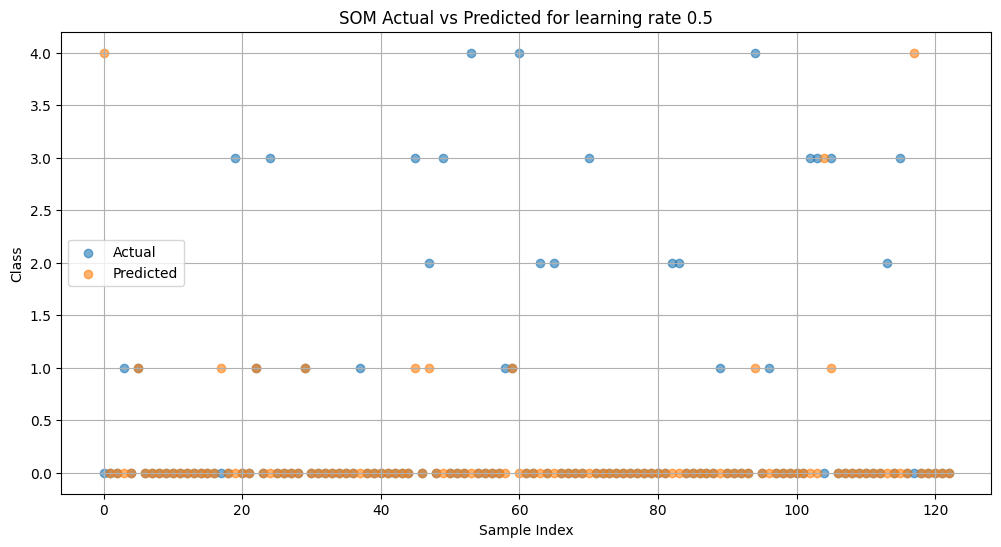

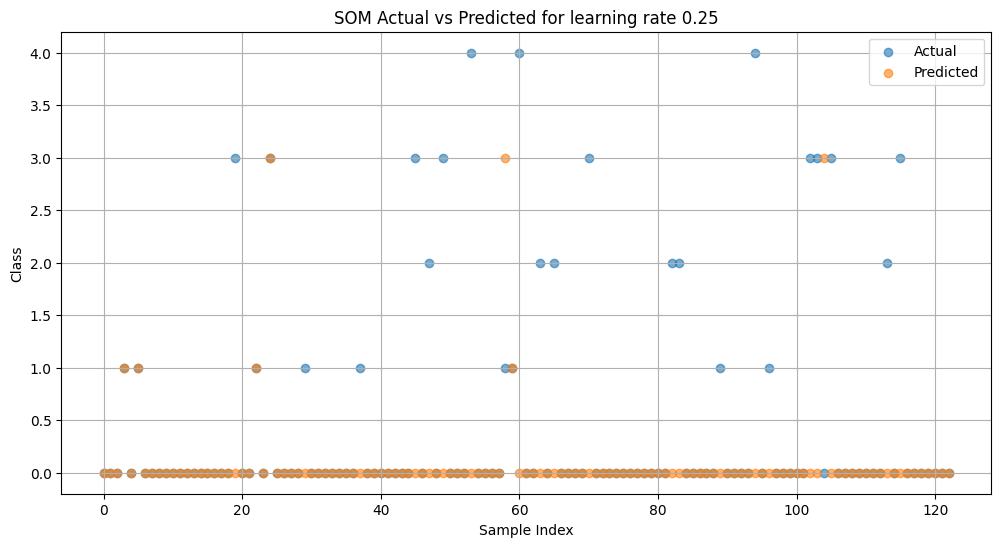

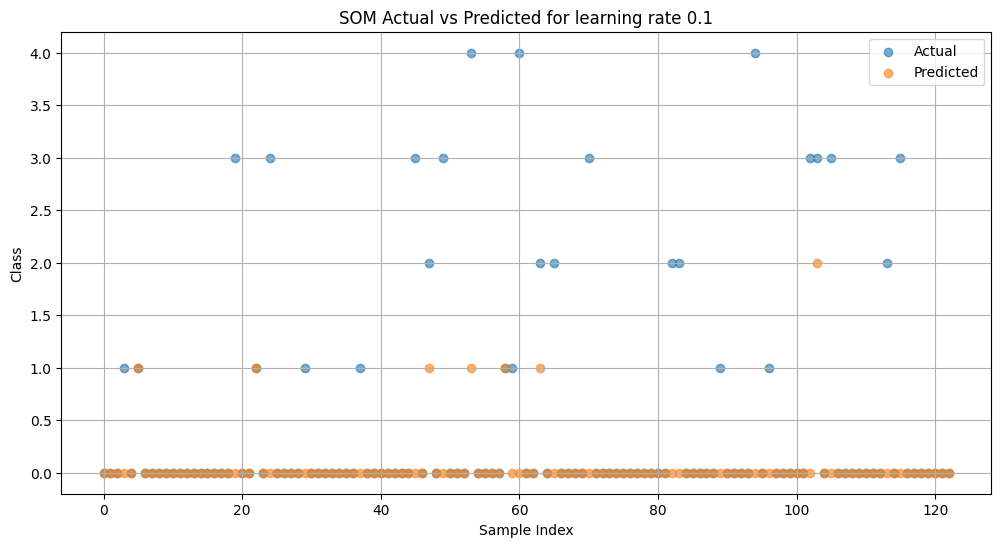

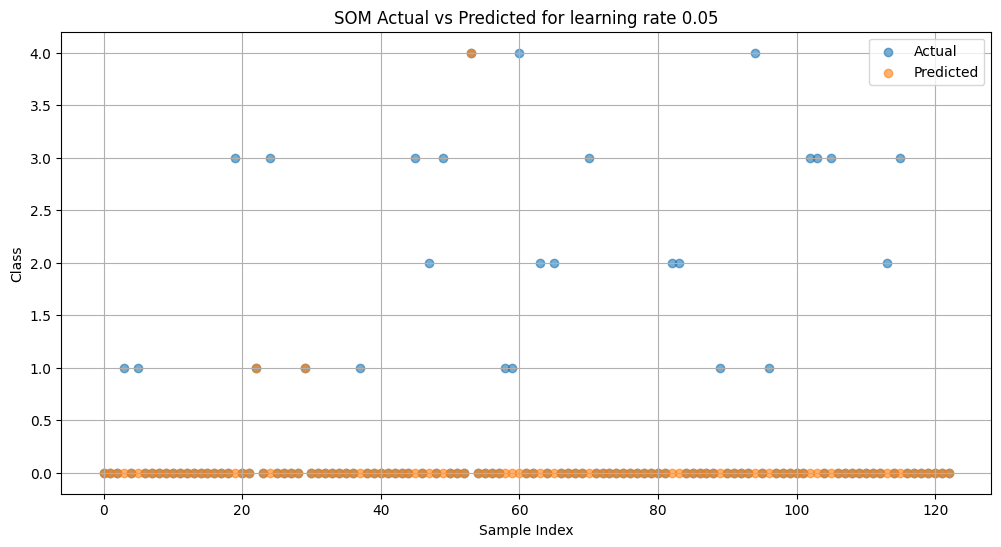

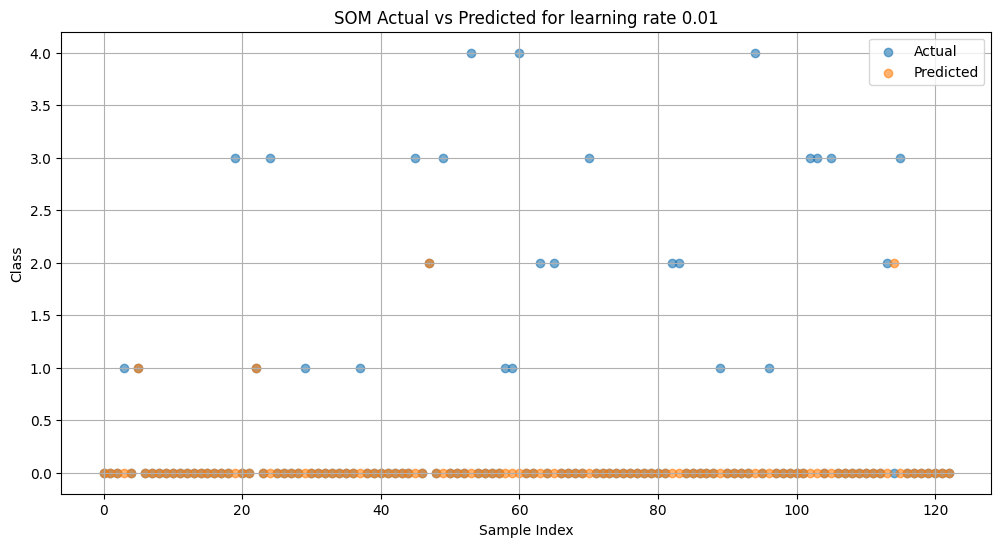

In [150]:
# Plotting Actual vs Predicted untuk SOM
for lr, y_pred in zip(learning_rates, som_predictions):
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(y_test)), y_test, alpha=0.6, label='Actual')
    plt.scatter(range(len(y_test)), y_pred, alpha=0.6, label='Predicted')
    plt.title(f'SOM Actual vs Predicted for learning rate {lr}')
    plt.xlabel('Sample Index')
    plt.ylabel('Class')
    plt.legend()
    plt.grid(True)
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

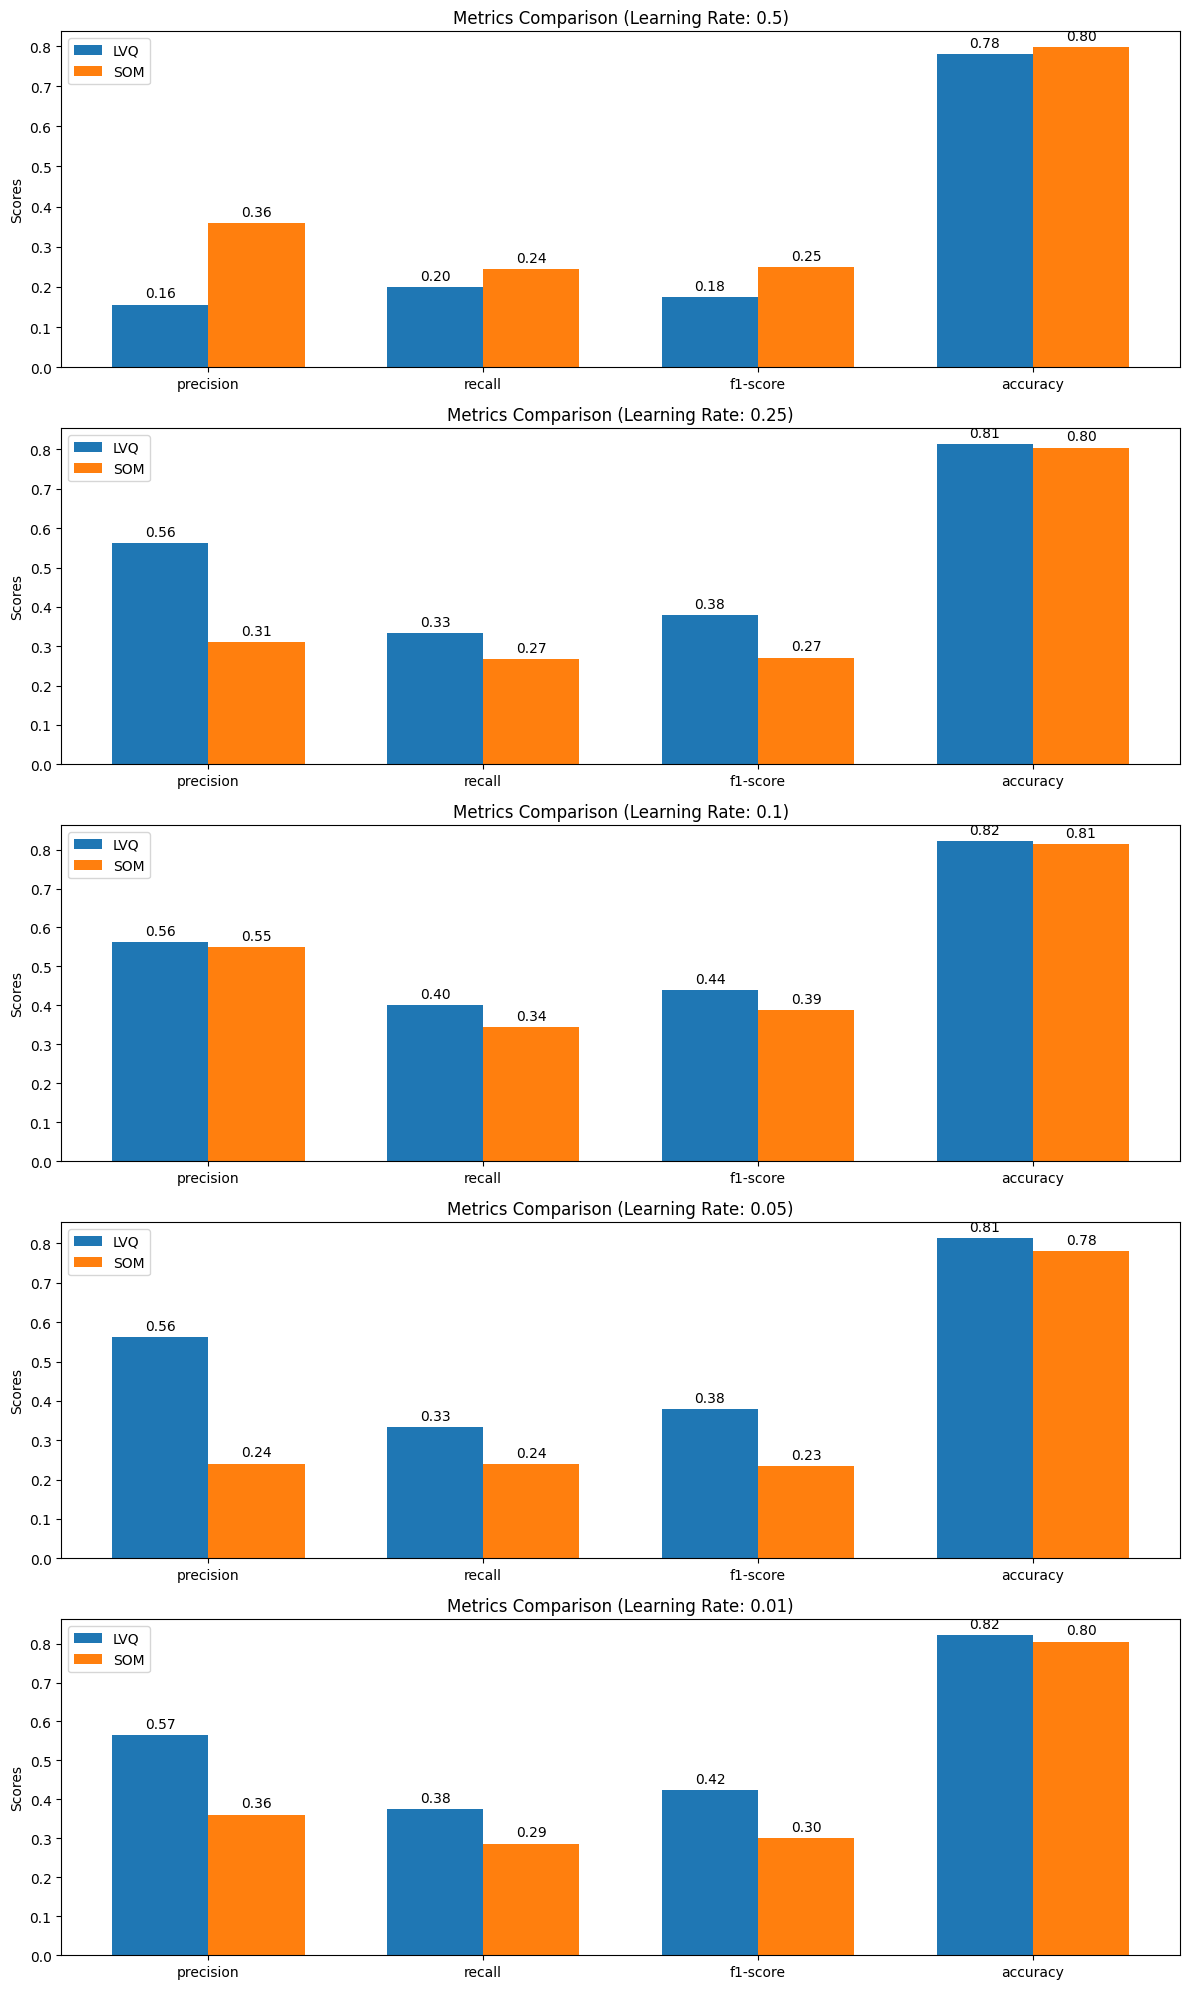

In [158]:
# Plotting classification reports metrics untuk LVQ and SOM
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
x = np.arange(len(metrics))
width = 0.35  # lebar bar

fig, axs = plt.subplots(len(learning_rates), 1, figsize=(12, len(learning_rates) * 4))

for i, lr in enumerate(learning_rates):
    lvq_report = classification_report(y_test, lvq_predictions[i], output_dict=True)
    som_report = classification_report(y_test, som_predictions[i], output_dict=True)

    lvq_metrics = [lvq_report['macro avg'][metric] for metric in metrics[:-1]] + [accuracy_score(y_test, lvq_predictions[i])]
    som_metrics = [som_report['macro avg'][metric] for metric in metrics[:-1]] + [accuracy_score(y_test, som_predictions[i])]

    rects1 = axs[i].bar(x - width/2, lvq_metrics, width, label='LVQ')
    rects2 = axs[i].bar(x + width/2, som_metrics, width, label='SOM')

    axs[i].set_title(f'Metrics Comparison (Learning Rate: {lr})')
    axs[i].set_ylabel('Scores')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(metrics)
    axs[i].legend()

    def autolabel(rects, ax):
        """Melampirkan text label untuk setiap bar di *rects*, dan menampilkan tingginya."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1, axs[i])
    autolabel(rects2, axs[i])

fig.tight_layout()
plt.show()
